In [24]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data

In [25]:
folder_path = u'C:/Users/user/Desktop/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)


In [26]:
folder_path = u'C:/Users/user/Desktop/AI-project/features/250' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Label mapping

In [27]:
#Sobstitute N, S, V with 0, 1, 2
label_mapping = {'N': 0, 'S': 1, 'V': 2}
for data in all_data_list:
    data['annotation'] = data['annotation'].replace(label_mapping)

# Drop positions columns    

In [28]:
#drop the columns which contain positional info
#for i in range(len(all_data_list)):
#    all_data_list[i] = all_data_list[i].drop(['peak_pos', 'onset', 'diastolic_notch'], axis=1)

In [29]:
all_data_list[0]

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055274,0.823215,0.886627,0.719899,0.042081,0.425326,0.723122,0.288666,0.024067,0.643411,0.967991,0.210000,0.000000,0.015020,0.000992,0
1,0.045354,0.814343,0.884302,0.712917,0.040983,0.423003,0.726116,0.288231,0.024067,0.232558,0.909492,0.229630,0.027357,0.015020,0.000561,0
2,0.045747,0.813519,0.884597,0.712486,0.040809,0.422454,0.726397,0.288305,0.022864,0.232558,0.910596,0.228571,0.027357,0.015020,0.000578,0
3,0.047270,0.813824,0.885389,0.713275,0.040509,0.422070,0.726600,0.288490,0.022864,0.240310,0.911700,0.227586,0.027357,0.008678,0.000659,0
4,0.036112,0.818934,0.883222,0.712234,0.038791,0.425694,0.724313,0.287615,0.027677,0.201550,0.901766,0.240000,0.021094,0.020360,0.000249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.046900,0.811773,0.884741,0.711761,0.041072,0.421604,0.726617,0.288342,0.025271,0.279070,0.915011,0.225000,0.031641,0.018358,0.000684,0
1956,0.049071,0.812713,0.885598,0.713176,0.040937,0.421452,0.726687,0.288525,0.025271,0.279070,0.915011,0.225000,0.030653,0.017356,0.000793,0
1957,0.047486,0.813713,0.876084,0.713276,0.050609,0.428090,0.762211,0.286395,0.036101,0.333333,0.912804,0.226667,0.029664,0.051736,0.002078,0
1958,0.049821,0.810715,0.870102,0.712228,0.057901,0.430694,0.737648,0.285364,0.046931,0.488372,0.924945,0.219512,0.063612,0.112483,0.005547,0


# Divide train/test

In [30]:
# Split Data
#A list of all csv is gived: because each element of a list represent a patient,
# a patient will stay only or in train or in test
train_list, test_list = train_test_split(all_data_list, test_size=0.2, random_state=42)
#train_list, val_list = train_test_split(train_list, test_size=0.2, random_state=42)

In [31]:
#Create a dataframe only for train and one for all test data
train_data = pd.DataFrame()
i = 0
for train in train_list:
    train_data = pd.concat([train_data, train], ignore_index=True)
    i = i + 1

In [32]:
# Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']

In [33]:
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(y_train, columns=['annotation'])

one_hot_encoded_array_train = one_hot_encoded_df.values

In [34]:
test_data = pd.DataFrame()

for test in test_list:
    test_data = pd.concat([test_data, test], ignore_index=True)

In [35]:
X_test = test_data.drop('annotation', axis=1)
y_test= test_data['annotation']

In [36]:
one_hot_encoded_df_test = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test = one_hot_encoded_df_test.values

In [37]:
N_train = (y_train == 0).sum() 
S_train = (y_train == 1).sum() 
V_train = (y_train == 2).sum() 

N_test = (y_test == 0).sum() 
S_test = (y_test == 1).sum() 
V_test = (y_test == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")
print("Total: ",N_train+V_train+S_train)

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di S in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di S in test: {V_perc}")
print("Total: ",N_test+V_test+S_test)

Perc di N in train: 0.9240884203168686
Perc di S in train: 0.04832391658900279
Perc di V in train: 0.027587663094128613
Total:  137344
Perc di S in test: 0.9049530732924645
Perc di S in test: 0.03013616882764607
Perc di S in test: 0.06491075787988933
Total:  36866


# Outliers removal

In [38]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train_rem = X_train.copy()

feature_list = X_train_rem.columns
print('Missing values before outlier removal: ' + str(X_train_rem.isnull().sum().sum()))

# apply zscore
scaler = StandardScaler().fit(X_train_rem)
zscore_features = scaler.transform(X_train_rem)

# select all those values with zscore > -+ 3  as outliers
abs_zscores = np.abs(zscore_features)

outliers_detected = abs_zscores > 3
print('Outliers detected (train): ' + str(np.sum(np.sum(outliers_detected))))

# set outliers as missing values
X_train_rem[outliers_detected] = np.nan

print('Missing values after outlier removal (train): ' + str(X_train_rem.isnull().sum().sum()))

Missing values before outlier removal: 0
Outliers detected (train): 23320
Missing values after outlier removal (train): 23320


In [39]:
df=pd.concat([X_train_rem,y_train],axis=1)
df2=df[df.isna().any(axis=1)]

N_train = (df2['annotation'] == 0).sum() 
S_train = (df2['annotation'] == 1).sum() 
V_train = (df2['annotation'] == 2).sum() 
print(N_train)
print(S_train)
print(V_train)

11956
1137
570


In [40]:
df = df.dropna(axis=0)
print('Missing values (train): ' + str(df.isnull().sum().sum()))

Missing values (train): 0


In [41]:
X_train_rem = df.drop('annotation', axis=1)
y_train_rem = df['annotation']

In [42]:
N_train = (y_train_rem == 0).sum() 
S_train = (y_train_rem == 1).sum() 
V_train = (y_train_rem == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")
print("Total: ",N_train+V_train+S_train)

Perc di N in train: 0.9295041275539493
Perc di S in train: 0.04446923941429969
Perc di V in train: 0.026026633031751036
Total:  123681


In [43]:
one_hot_encoded_df_rem = pd.get_dummies(y_train_rem, columns=['annotation'])

one_hot_encoded_array_train_rem = one_hot_encoded_df.values

In [44]:
X_test_rem = X_test.copy()
zscore_features = scaler.transform(X_test_rem)
abs_zscores = np.abs(zscore_features)
outliers_detected = abs_zscores > 3
print('Outliers detected (validation): ' + str(np.sum(np.sum(outliers_detected))))


X_test_rem[outliers_detected] = np.nan

print('Missing values after outlier removal (validation): ' + str(X_test_rem.isnull().sum().sum()))

Outliers detected (validation): 3820
Missing values after outlier removal (validation): 3820


In [45]:
df=pd.concat([X_test_rem,y_test],axis=1)
df2=df[df.isna().any(axis=1)]

N_train = (df2['annotation'] == 0).sum() 
S_train = (df2['annotation'] == 1).sum() 
V_train = (df2['annotation'] == 2).sum() 
print(N_train)
print(S_train)
print(V_train)

2066
53
182


In [46]:
df = df.dropna(axis=0)
print('Missing values (train): ' + str(df.isnull().sum().sum()))

Missing values (train): 0


In [47]:
X_test_rem = df.drop('annotation', axis=1)
y_test_rem = df['annotation']

In [48]:
N_test = (y_test_rem == 0).sum() 
S_test = (y_test_rem == 1).sum() 
V_test = (y_test_rem == 2).sum() 

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di S in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di S in test: {V_perc}")
print("Total: ",N_test+V_test+S_test)

Perc di S in test: 0.9054245624186316
Perc di S in test: 0.030608997540865036
Perc di S in test: 0.0639664400405034
Total:  34565


In [49]:
one_hot_encoded_df_test_rem = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test_rem = one_hot_encoded_df_test.values

# Useful functions

In [50]:
# produce a normalized convulational matrix
def show_confusion_matrix(y_predi, model_name_pred):

    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    cm = confusion_matrix(test_classes, predicted_class)
    classes_name = ['N', 'S', 'V']
    
    
    #Normalized cm
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.title(model_name_pred)
    plt.show()

In [51]:
def downsample_majority_class(df, class_column):
    
    # Calculate the class counts
    class_counts = df[class_column].value_counts()
    
    print(class_counts)

    # Find the maximum value among the two least represented classes
    min_class_size = class_counts.nsmallest(2).min()

    subsampled_df = pd.DataFrame()

    for class_label in class_counts.index:
        class_subset = df[df[class_column] == class_label]

        # Downsample if this is the majority class
        if class_counts[class_label] > min_class_size:
            class_subset = class_subset.sample(n=min_class_size, random_state=42)
        
        subsampled_df = pd.concat([subsampled_df, class_subset], ignore_index=True)
        
    class_counts_sub = subsampled_df[class_column].value_counts()
    print(class_counts_sub)

    return subsampled_df

In [52]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def compute_metrics (y_predi):
    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    print("Balanced accuracy score: ", balanced_accuracy_score(test_classes, predicted_class))
    print("Accuracy score: ", accuracy_score(test_classes, predicted_class))
    print("F1 score: ", f1_score(test_classes, predicted_class,average='macro'))
    print("Precision score: ", precision_score(test_classes, predicted_class,average='macro'))
    print("Recall score: ", recall_score(test_classes, predicted_class,average='macro'))
    

# Class weights

In [58]:
nN = np.count_nonzero(y_train == 0)
nV = np.count_nonzero(y_train == 1)
nS = np.count_nonzero(y_train == 2)

class_sum = nN+nV+nS
wN = round(1-(nN/class_sum),2)
wV = round(1-(nV/class_sum),2)  
wS = round(1-(nS/class_sum),2)

class_freq = {0: wN, 1: wV, 2: wS}

print(class_freq)

{0: 0.08, 1: 0.95, 2: 0.97}


In [59]:
nN = np.count_nonzero(y_train_rem == 0)
nV = np.count_nonzero(y_train_rem == 1)
nS = np.count_nonzero(y_train_rem == 2)

class_sum = nN+nV+nS
wN = round(1-(nN/class_sum),2)
wV = round(1-(nV/class_sum),2)  
wS = round(1-(nS/class_sum),2)

class_freq_rem = {0: wN, 1: wV, 2: wS}

print(class_freq_rem)

{0: 0.07, 1: 0.96, 2: 0.97}


In [55]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight='balanced', classes=[0.,1.,2.], y=y_train)

keys = np.arange(0,3,1)
class_weights = dict(zip(keys, weights))
class_weights

{0: 0.36071584277512514, 1: 6.897895635578323, 2: 12.082695522125452}

In [56]:
weights = compute_class_weight(class_weight='balanced', classes=[0.,1.,2.], y=y_train_rem)

keys = np.arange(0,3,1)
class_weights_rem = dict(zip(keys, weights))
class_weights_rem

{0: 0.3586141507628608, 1: 7.495818181818182, 2: 12.807393600497049}

# Feature selection

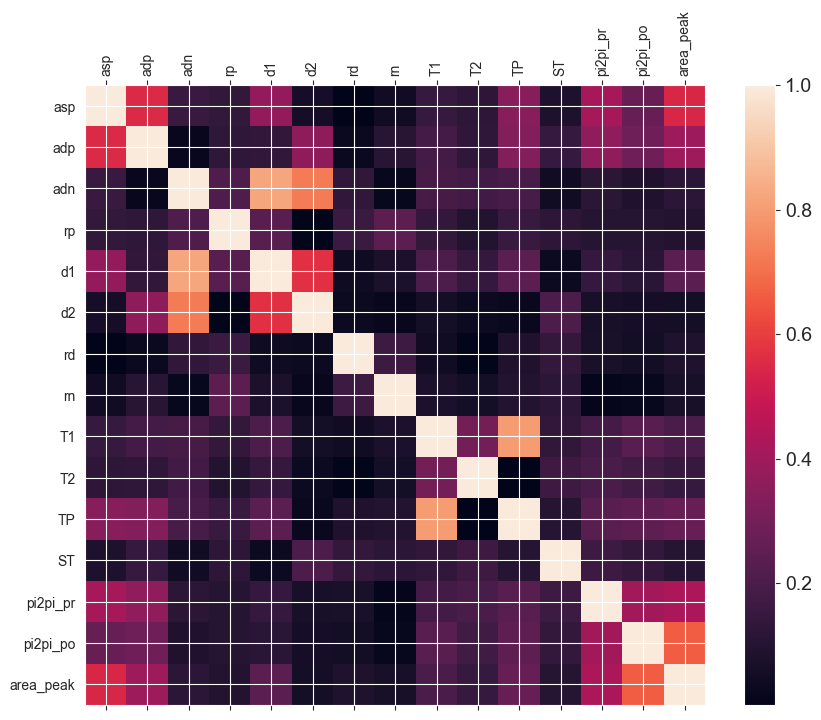

In [241]:
cor_matrix = X_train.corr().abs()
feature_list = X_train.columns
f = plt.figure(figsize=(10, 8))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)
plt.yticks(range(len(feature_list)), feature_list, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [242]:
correlated_features = set()
correlation_matrix = X_train.corr()
median_corr = (correlation_matrix.abs()).median(axis=0)

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            if median_corr[i] < median_corr[j]:
                colname = correlation_matrix.columns[i]
            else:
                colname = correlation_matrix.columns[j]
            correlated_features.add(colname)
X_train.drop(labels=correlated_features, axis=1, inplace=True)
# see how it drops correlated / drop the one that had a lower correlation w.r to the other feat
print('Deleted features: ' + str(correlated_features))

Deleted features: {'adn', 'd2', 'T1'}


C:\Users\user\AppData\Local\Temp\ipykernel_25408\1876883640.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if median_corr[i] < median_corr[j]:


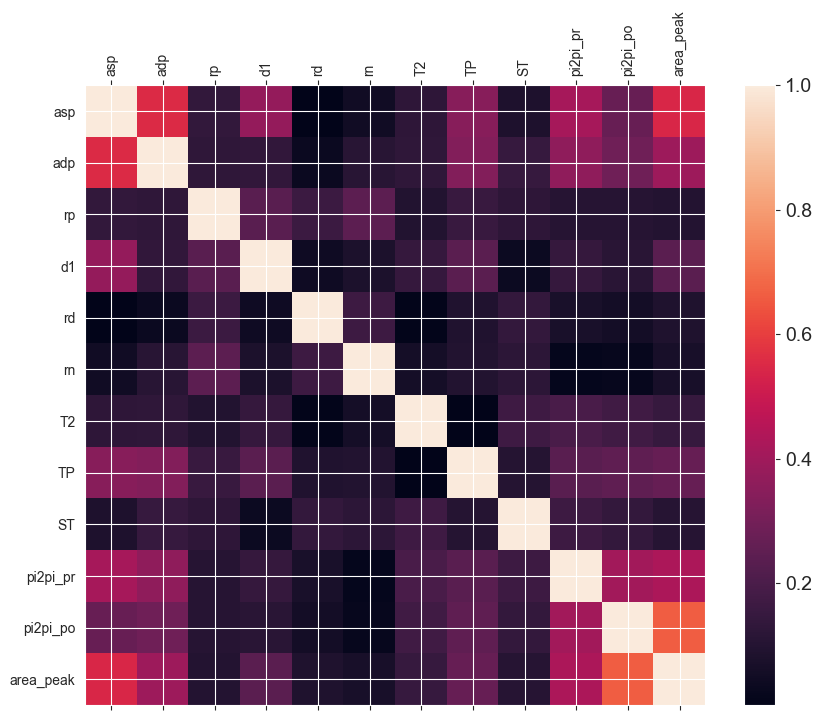

In [243]:
cor_matrix = X_train.corr().abs()
feature_list = list(X_train.columns)
f = plt.figure(figsize=(10, 8))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)
plt.yticks(range(len(feature_list)), feature_list, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [244]:
X_test = X_test[feature_list]
X_test

,asp,adp,rp,d1,rd,rn,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak
7,0.167071,0.722429,0.881493,0.113784,0.077512,0.791480,0.119718,0.439024,0.321839,0.109312,0.051724,0.000000
8,0.163834,0.722429,0.881392,0.112276,0.077539,0.791525,0.119718,0.658537,0.362319,0.109312,0.051724,0.009166
9,0.164541,0.720765,0.881352,0.115078,0.077468,0.791280,0.140845,0.658537,0.362319,0.109312,0.051724,0.009406
10,0.162140,0.723079,0.881361,0.115887,0.077412,0.791119,0.140845,0.658537,0.362319,0.109312,0.050287,0.008756
11,0.161144,0.720975,0.881243,0.115638,0.077427,0.791107,0.140845,0.658537,0.362319,0.107962,0.050287,0.008581
...,...,...,...,...,...,...,...,...,...,...,...,...
36855,0.423386,0.688054,0.593188,0.365005,0.172871,0.811847,0.296296,0.766304,0.596913,0.146728,0.251201,0.089873
36856,0.411826,0.690599,0.593082,0.470037,0.187856,0.807681,0.248677,0.728261,0.615385,0.278916,0.104324,0.031890
36857,0.449836,0.744941,0.594719,0.351952,0.172973,0.812554,0.201058,0.760870,0.598930,0.137475,0.124914,0.090600
36859,0.464852,0.612352,0.592158,0.339432,0.173787,0.813046,0.275132,0.823370,0.582310,0.164574,0.096774,0.082554


In [207]:
from sklearn.decomposition import PCA
varianceThreshold = 0.9
pca_features = PCA(n_components = varianceThreshold) # dimensionality reduction
pca_features.fit(X_train)

X_train = pca_features.transform(X_train)
print(np.shape(X_train))

X_test = pca_features.transform(X_test)
print(np.shape(X_test))

(123681, 5)
(34565, 5)


# Downsampled sets

In [60]:
train = pd.concat([X_train,y_train],axis=1)
train

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055880,0.801983,0.799544,0.681870,0.070597,0.433180,0.458742,0.485321,0.018545,0.212121,0.941617,0.775000,0.000000,0.065539,0.003993,0
1,0.057403,0.803716,0.801356,0.682360,0.070312,0.432627,0.458752,0.485533,0.017118,0.202020,0.941617,0.775000,0.102538,0.067653,0.004384,0
2,0.057984,0.802885,0.800347,0.682358,0.071546,0.432986,0.458729,0.485352,0.019971,0.232323,0.943114,0.772414,0.104569,0.065539,0.004580,0
3,0.057484,0.803932,0.800936,0.682399,0.070705,0.432987,0.458743,0.485465,0.018545,0.212121,0.941617,0.775000,0.102538,0.068710,0.004438,0
4,0.057938,0.802728,0.801323,0.682332,0.070741,0.432279,0.458749,0.485501,0.018545,0.222222,0.943114,0.772414,0.105584,0.064482,0.004605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137339,0.049199,0.836044,0.187404,0.199390,0.808075,1.000000,0.572823,0.890823,0.377079,1.000000,0.665098,0.935655,0.019520,0.015022,0.000000,0
137340,0.046219,0.836044,0.187404,0.199143,0.806709,1.000000,0.572820,0.887826,0.292135,1.000000,0.745937,0.934561,0.019624,0.014918,0.000000,0
137341,0.036760,0.836044,0.187404,0.197617,0.802374,1.000000,0.572812,0.869294,0.207640,1.000000,0.826347,0.930344,0.019520,0.035990,0.000000,0
137342,0.266708,0.836044,0.187404,0.201062,0.907759,1.000000,0.573021,0.911134,0.032360,1.000000,0.993157,0.941120,0.040494,0.137492,0.282995,0


In [61]:
train_df = downsample_majority_class(train,'annotation')

# Creating training and testing sets
X_train_d = train_df.drop(['annotation'], axis=1)
y_train_d = train_df['annotation']

annotation
0    126918
1      6637
2      3789
Name: count, dtype: int64
annotation
0    3789
1    3789
2    3789
Name: count, dtype: int64


In [62]:
train = pd.concat([X_train_rem,y_train_rem],axis=1)
train

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055880,0.801983,0.799544,0.681870,0.070597,0.433180,0.458742,0.485321,0.018545,0.212121,0.941617,0.775000,0.000000,0.065539,0.003993,0
1,0.057403,0.803716,0.801356,0.682360,0.070312,0.432627,0.458752,0.485533,0.017118,0.202020,0.941617,0.775000,0.102538,0.067653,0.004384,0
2,0.057984,0.802885,0.800347,0.682358,0.071546,0.432986,0.458729,0.485352,0.019971,0.232323,0.943114,0.772414,0.104569,0.065539,0.004580,0
3,0.057484,0.803932,0.800936,0.682399,0.070705,0.432987,0.458743,0.485465,0.018545,0.212121,0.941617,0.775000,0.102538,0.068710,0.004438,0
4,0.057938,0.802728,0.801323,0.682332,0.070741,0.432279,0.458749,0.485501,0.018545,0.222222,0.943114,0.772414,0.105584,0.064482,0.004605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137334,0.053171,0.845806,0.716866,0.200235,0.262828,0.517182,0.569021,0.913441,0.026067,0.277778,0.910180,0.951923,0.023051,0.010119,0.001117,0
137335,0.031052,0.848027,0.725521,0.197720,0.243748,0.510216,0.571959,0.914476,0.096180,0.076389,0.818648,0.931208,0.014744,0.017004,0.000000,1
137336,0.039120,0.848027,0.725521,0.199565,0.247445,0.510216,0.571680,0.913978,0.002697,0.076389,0.907613,0.953390,0.021597,0.018882,0.000678,0
137337,0.048010,0.845696,0.722647,0.200011,0.254489,0.511812,0.571065,0.913682,0.015281,0.142361,0.903764,0.956250,0.023466,0.012936,0.001007,0


In [63]:
train_df = downsample_majority_class(train,'annotation')

# Creating training and testing sets
X_train_rem_d = train_df.drop(['annotation'], axis=1)
y_train_rem_d = train_df['annotation']

annotation
0    114962
1      5500
2      3219
Name: count, dtype: int64
annotation
0    3219
1    3219
2    3219
Name: count, dtype: int64


# Models

# Grid search

In [33]:
from sklearn.model_selection import GridSearchCV
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))


In [34]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(50,120,2)}

hyperp_search(classifier,parameters)

C:\Users\user\Desktop\AI-project\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


f1_train: nan using {'n_neighbors': 50}


In [36]:
# SVC
from sklearn.svm import SVC  
classifier = SVC()
parameters = {"kernel":['linear','rbf'], 
              "C":[0.001,0.005,0.01,0.05,0.1],
              "gamma":[0.01,0.1,1],
              "class_weight":[None,class_weights,class_freq]}
hyperp_search(classifier,parameters)

KeyboardInterrupt: 

In [37]:
# Random Forest
parameter_grid = { 
    'n_estimators': np.arange(20,100,10),
    'max_depth' : [10, 15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : np.arange(20,40,2),
    "class_weight":[None,class_weights,class_freq]
}
hyperp_search(classifier,parameters)

KeyboardInterrupt: 

In [ ]:
# Balanced Random Forest
from imblearn.ensemble import BalancedRandomForestClassifier
classifier=BalancedRandomForestClassifier()
parameter_grid = { 
    'n_estimators': np.arange(20,100,10),
    'max_depth' : [10, 15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : np.arange(20,40,2),
    "class_weight":[None,class_weights,class_freq],
    "max_features":[None],
    "sampling_strategy":['not minority','majority','all'],
    "random_state":[42],
    "class_weight":[None,class_weights,class_freq]
}
hyperp_search(classifier,parameters)

In [ ]:
# EasyEnsemble
from imblearn.ensemble import EasyEnsembleClassifier
classifier = EasyEnsembleClassifier()
parameter_grid = { 
    'n_estimators': np.arange(20,100,10),
    "sampling_strategy":['not minority','majority','all'],
    "random_state":[42],
}
hyperp_search(classifier,parameters)


In [ ]:
# Neural network
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(7,5,3,2),(7,5,3),(10, 5),(10, 5,2)], 
              "max_iter": [1000,5000,10000], 
              "alpha": [0.001,0.009,0.1,0.9,1]}
hyperp_search(classifier,parameters)